## Validation Data

In [14]:
import os
import pandas as pd
import torch
from pathlib import Path
from tqdm import tqdm
import glob

names = ["karate", "airports", "facebook", "actor", "wiki"]
#names = ["karate", "airports", "facebook", "actor", "wiki"]

rw_metrics = {}

for name in tqdm(names):
    if name == "synthetic":
        continue
    data_file = Path(f"../data/validation/{name}/raw/0.pt")
    data = torch.load(data_file)
    rw_metrics[name] = data.metrics

metrics = []
settings = []


for name in tqdm(names):
    data_dir = Path(f"../data/validation/{name}/raw")
    data_files = os.listdir(data_dir)
    data_files = glob.glob(f"{data_dir}/*.pt")

    for data_file in tqdm(data_files):
        data = torch.load(data_file)
        if name == "synthetic":
            metrics.append(data.metrics)
        else:
            metrics.append(rw_metrics[name])
        settings.append(data.settings)
        if name != "synthetic":
            data.settings["graph_type"] = name

training_data_files = glob.glob(f"{Path(f'../data/training/synthetic/raw')}/*.pt")
for data_file in tqdm(training_data_files):
    data = torch.load(data_file)
    metrics.append(data.metrics)
    settings.append(data.settings)
    #data.settings["graph_type"] = "synthetic"

df_metrics = pd.DataFrame(metrics)
df_settings = pd.DataFrame(settings)
df_metrics.to_csv("metrics.csv")
df_settings.to_csv("settings.csv")

df_settings = pd.read_csv("settings.csv")
df_metrics = pd.read_csv("metrics.csv")
df_metrics = df_metrics.drop(columns=["Unnamed: 0"])
rw_metrics = df_metrics.join(df_settings)

# df_metrics = pd.concat([df_metrics, rw_metrics], axis=0)
rw_metrics["percentages_infected"] = rw_metrics["currently_infected"] / rw_metrics["n_nodes"]
rw_metrics


100%|██████████| 2000/2000 [00:01<00:00, 1397.07it/s]


,diameter,average_shortest_path_length,average_clustering_coefficient,average_degree,n_nodes,n_edges,avg_degree_centrality,Unnamed: 0,graph_type,neighbours,prob_reconnect,beta,threshold_infected,iterations,percentage_initially_infected,currently_infected,percentages_infected
0,5,2.408200,0.570638,4.588235,34,78,0.139037,0,karate,-1,-1.000000,0.009705,0.299683,69,0.027503,11,0.323529
1,5,2.408200,0.570638,4.588235,34,78,0.139037,1,karate,-1,-1.000000,0.009537,0.229590,74,0.040766,8,0.235294
2,5,2.408200,0.570638,4.588235,34,78,0.139037,2,karate,-1,-1.000000,0.008431,0.285821,90,0.044880,10,0.294118
3,5,2.408200,0.570638,4.588235,34,78,0.139037,3,karate,-1,-1.000000,0.005053,0.430548,100,0.014709,14,0.411765
4,5,2.408200,0.570638,4.588235,34,78,0.139037,4,karate,-1,-1.000000,0.007290,0.201655,32,0.045916,7,0.205882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,5,3.260647,0.256141,22.000000,3870,42570,0.005686,2995,watts_strogatz,22,0.294268,0.006940,0.497209,28,0.032548,2159,0.557881
2996,6,3.504797,0.016941,7.988502,2783,11116,0.002871,2996,barabasi_albert,4,-1.000000,0.008499,0.310573,33,0.036609,923,0.331656
2997,5,3.509446,0.334951,20.000000,4132,41320,0.004841,2997,watts_strogatz,20,0.223235,0.008234,0.199211,18,0.028566,1004,0.242982
2998,5,3.374230,0.014748,9.987342,3950,19725,0.002529,2998,barabasi_albert,5,-1.000000,0.009270,0.251801,25,0.019265,1079,0.273165


In [ ]:
training_data_files = glob.glob(f"{Path(f'../data/training/synthetic/processed')}/*.pt")
for data_file in tqdm(training_data_files):
    data = torch.load(data_file)
    print(data.x.shape)

['barabasi_albert' 'watts_strogatz' 'airports' 'facebook' 'karate' 'actor'
 'wiki']
['barabasi_albert' 'watts_strogatz' 'real']
[<matplotlib.collections.PathCollection object at 0x7fe80c0bfeb0>, <matplotlib.collections.PathCollection object at 0x7fe80c0bc880>, <matplotlib.collections.PathCollection object at 0x7fe80c0bd2a0>, <matplotlib.collections.PathCollection object at 0x7fe80c0be290>, <matplotlib.collections.PathCollection object at 0x7fe80c0bce50>, <matplotlib.collections.PathCollection object at 0x7fe80c0be470>, <matplotlib.collections.PathCollection object at 0x7fe80c0bfcd0>] ['barabasi_albert', 'watts_strogatz', 'airports', 'facebook', 'karate', 'actor', 'wiki']


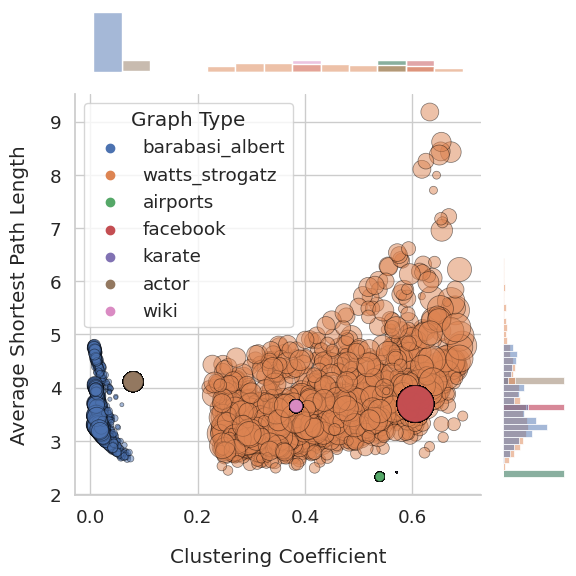

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create a new column synthetic_or_real containing either "synthetic" or "real" depending on the graph type
rw_metrics["synthetic_or_real"] = rw_metrics["graph_type"].apply(lambda x: "barabasi_albert" if x == "barabasi_albert" else "watts_strogatz" if x=="watts_strogatz" else "real")
rw_metrics["sorting_column"] = rw_metrics["graph_type"].apply(lambda x: 0 if x == "barabasi_albert" else 1 if x=="watts_strogatz" else 2)
rw_metrics = rw_metrics.sort_values(by=["sorting_column"], ascending=True)
print(rw_metrics["graph_type"].unique())
print(rw_metrics["synthetic_or_real"].unique())

# Create the plot where the data from every folder has to be plotted in a different color.
g1 = sns.JointGrid(
    data=rw_metrics, 
    # y="avg_degree_centrality", 
    # y="diameter", 
    x="average_clustering_coefficient", 
    y="average_shortest_path_length", 
    # y="n_edges", 
    hue="graph_type",
)
g1.plot_joint(sns.scatterplot, edgecolor="black", linewidth=0.5, s=rw_metrics["n_edges"]/rw_metrics["n_edges"].max() * 700, alpha=.5)

# Filter the dataframe to exclude "real" graph type
rw_metrics_filtered = rw_metrics[rw_metrics["synthetic_or_real"] != "real"]
g1.plot_marginals(sns.histplot, data=rw_metrics_filtered, hue="synthetic_or_real")

# Customize the plot
g1.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g1.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# # set x-axis range and rotate labels
# g1.ax_joint.set_xlim(0, 5)
# g1.ax_joint.set_xticks(np.arange(0, 5, 0.5))

# Set plot title and axis labels
g1.set_axis_labels("Clustering Coefficient", "Average Shortest Path Length", labelpad=15)

# Change the legend item names to be more readable (Barabasi-Albert, Watts-Strogatz, Real World)
# move the legend to an empty part of the plot (top left)

rename_dict = {
    "barabasi_albert":"Barabasi-Albert",
    "watts_strogatz":"Watts-Strogatz",
    "actor":"Actor",
    "airports":"Airports",
    "facebook":"Facebook",
    "karate":"Karate",
    "wiki":"Wiki",
    "real":"Real-World"
}
rw_metrics["graph_type"] = rw_metrics["graph_type"].apply(lambda x: rename_dict[x])

handles, labels = g1.ax_joint.get_legend_handles_labels()
print(handles, labels)
g1.ax_joint.legend(title='Graph Type', loc="upper left")

#sns.move_legend(g1.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_1519435/241870465.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


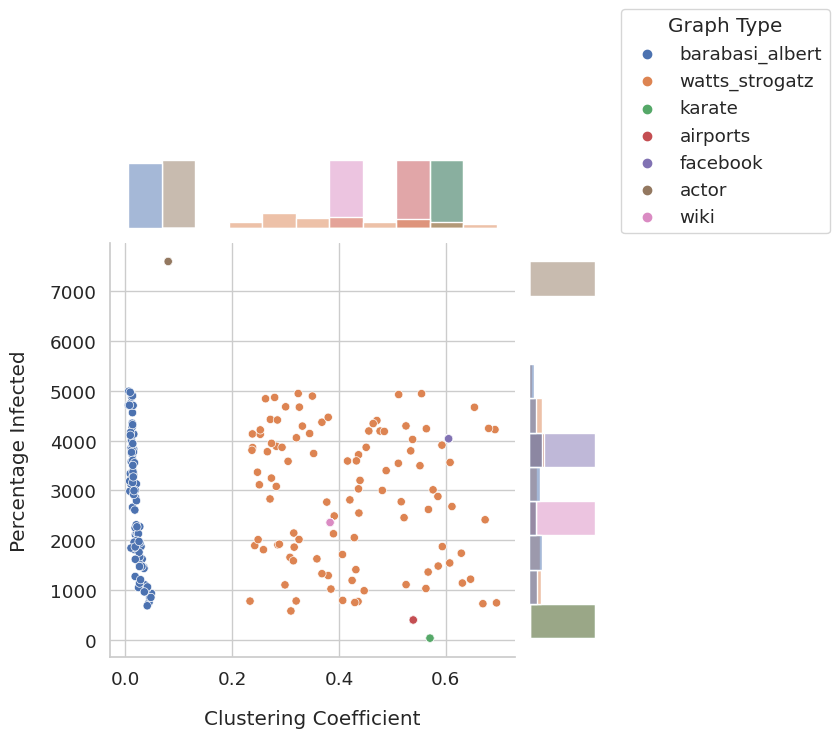

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g = sns.JointGrid(
    data=rw_metrics, 
    x="average_clustering_coefficient", 
    # x="avg_degree_centrality", 
    y="n_nodes", 
    hue="graph_type",
)
g.plot(sns.scatterplot, sns.histplot)

# Customize the plot
g.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
g.set_axis_labels("Clustering Coefficient", "Percentage Infected", labelpad=15)
sns.move_legend(g.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()

## Training Data:

In [1]:
# iterate over every data object in the data/training/synthetic/raw folder
import os
import pandas as pd
import torch
from pathlib import Path
from tqdm import tqdm
import glob

data_dir = Path("../data/training/synthetic/raw")
data_files = os.listdir(data_dir)
data_files = glob.glob(f"{data_dir}/*.pt")

# create a list of dictionaries to store the data
metrics = []
settings = []

for data_file in tqdm(data_files):
    data = torch.load(data_file)
    metrics.append(data.metrics)
    settings.append(data.settings)
df_metrics = pd.DataFrame(metrics)
df_settings = pd.DataFrame(settings)
df_metrics.to_csv("metrics.csv")
df_settings.to_csv("settings.csv")

df_settings = pd.read_csv("settings.csv")
df_metrics = pd.read_csv("metrics.csv")
df_metrics = df_metrics.drop(columns=["Unnamed: 0"])
df_metrics = df_metrics.join(df_settings)

# df_metrics = pd.concat([df_metrics, rw_metrics], axis=0)
df_metrics["percentages_infected"] = df_metrics["currently_infected"] / df_metrics["n_nodes"]
df_metrics


100%|██████████| 10000/10000 [01:06<00:00, 149.43it/s]


,diameter,average_shortest_path_length,average_clustering_coefficient,average_degree,n_nodes,n_edges,avg_degree_centrality,Unnamed: 0,graph_type,neighbours,prob_reconnect,beta,threshold_infected,iterations,percentage_initially_infected,currently_infected,percentages_infected
0,9,5.107458,0.638840,16.000000,2340,18720,0.006841,0,watts_strogatz,17,0.032703,0.009739,0.450182,28,0.039637,1133,0.484188
1,6,3.816017,0.580215,18.000000,1438,12942,0.012526,1,watts_strogatz,19,0.065915,0.005080,0.126539,16,0.049878,191,0.132823
2,7,4.640237,0.486541,10.000000,1378,6890,0.007262,2,watts_strogatz,11,0.105226,0.008024,0.115572,16,0.046826,173,0.125544
3,5,3.221184,0.022943,9.976841,2159,10770,0.004623,3,barabasi_albert,5,-1.000000,0.005766,0.309074,40,0.028926,694,0.321445
4,5,3.290559,0.014127,11.985044,4814,28848,0.002490,4,barabasi_albert,6,-1.000000,0.008784,0.201251,20,0.020391,1090,0.226423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,3.424341,0.245728,20.000000,4516,45160,0.004430,9995,watts_strogatz,21,0.302534,0.006179,0.263211,21,0.047589,1375,0.304473
9996,7,4.461760,0.647301,24.000000,4673,56076,0.005137,9996,watts_strogatz,24,0.034053,0.006745,0.103777,9,0.044780,599,0.128183
9997,5,3.200333,0.022886,9.974425,1955,9750,0.005105,9997,barabasi_albert,5,-1.000000,0.009625,0.260953,26,0.041314,583,0.298210
9998,6,3.734523,0.473764,18.000000,2707,24363,0.006652,9998,watts_strogatz,19,0.125371,0.007113,0.276290,33,0.020027,823,0.304027


In [ ]:
print(list(df_metrics.columns))

/tmp/ipykernel_1519435/1763216110.py:35: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


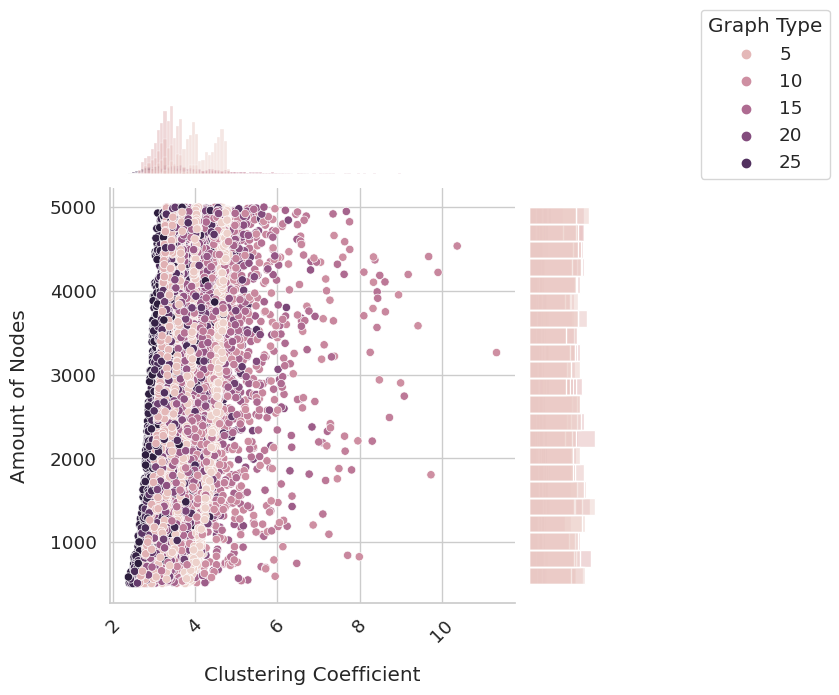

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g1 = sns.JointGrid(
    data=df_metrics, 
    # y="avg_degree_centrality", 
    # y="diameter", 
    x="average_shortest_path_length", 
    y="n_nodes", 
    # y="n_edges", 
    hue="neighbours",
)
g1.plot(sns.scatterplot, sns.histplot)

# make the x-axis more dense
#g1.ax_joint.set_xticks(np.arange(3, 10, 0.5))
# rotate the x-axis labels
g1.ax_joint.tick_params(axis='x', rotation=45)

# Customize the plot
g1.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g1.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
g1.set_axis_labels("Clustering Coefficient", "Amount of Nodes", labelpad=15)
sns.move_legend(g1.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()

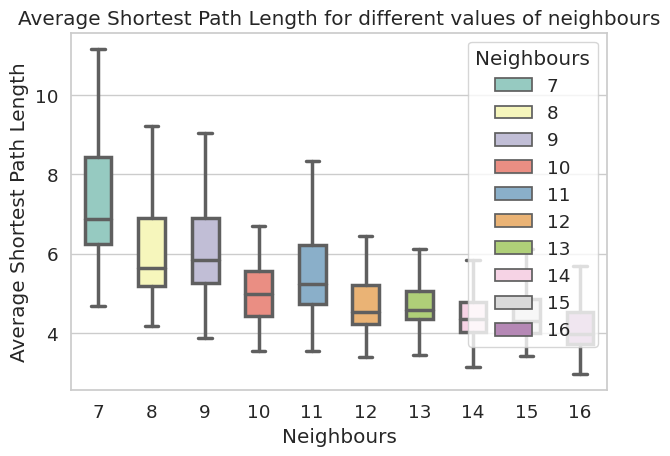

In [84]:
# display the average_shortest_path_length as a boxplot with annotations for the different values of neighbours
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g1 = sns.boxplot(
    data=df_metrics,
    x="neighbours",
    y="average_shortest_path_length",
    hue="neighbours",
    palette="Set3",
    linewidth=2.5,
    showfliers=False,
    width=0.5,
    dodge=False,
)

# Customize the plot
g1.set_xlabel("Neighbours")
g1.set_ylabel("Average Shortest Path Length")
g1.set_title("Average Shortest Path Length for different values of neighbours")
g1.legend(loc="upper right", title="Neighbours")

# Show the plot
plt.tight_layout()
plt.show()

range: 0 - 0.11


/tmp/ipykernel_1408435/809814339.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


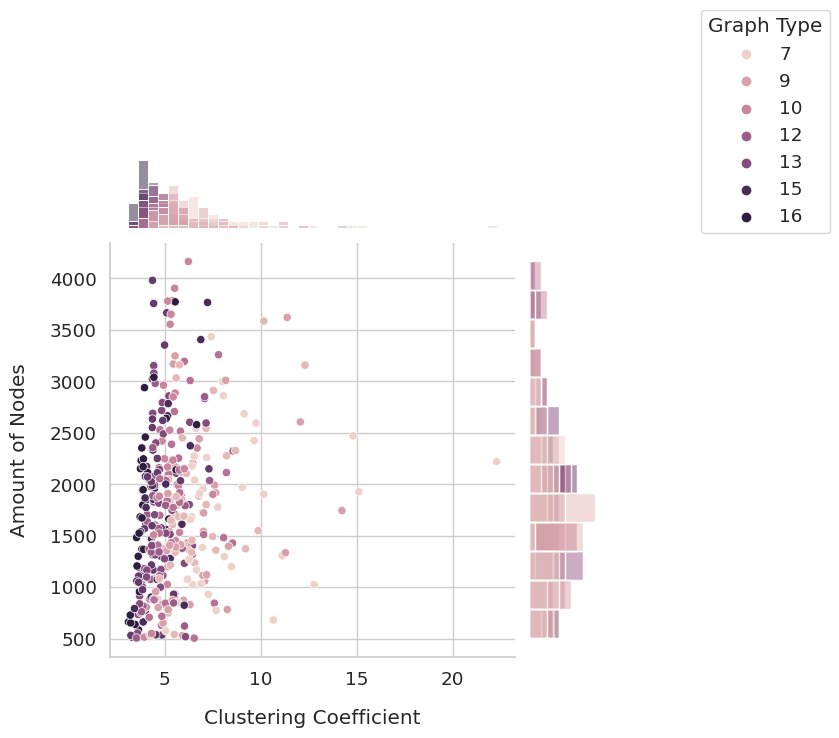

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# create the plot above for every value of prob_reconnect in the range of 0.01 to 0.4 with a step size of 0.1
last = 0
for prob_reconnect in np.arange(0.11, 0.21, 0.2):
    print(f"range: {last} - {prob_reconnect}")
    df = df_metrics[df_metrics["prob_reconnect"].between(last, prob_reconnect)]
    # Set the style
    sns.set(style="whitegrid", font_scale=1.2)

    # Create the plot where the data from every folder has to be plotted in a different color.
    g1 = sns.JointGrid(
        data=df, 
        # y="avg_degree_centrality", 
        # y="diameter", 
        x="average_shortest_path_length", 
        y="n_nodes", 
        # y="n_edges", 
        hue="neighbours",
    )
    g1.plot(sns.scatterplot, sns.histplot)

    # Customize the plot
    g1.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
    g1.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

    # Set plot title and axis labels
    g1.set_axis_labels("Clustering Coefficient", "Amount of Nodes", labelpad=15)
    sns.move_legend(g1.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

    # Show the plot
    plt.tight_layout()
    plt.show()
    last = prob_reconnect



range: 0 - 0.11


/tmp/ipykernel_1408435/4196495977.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


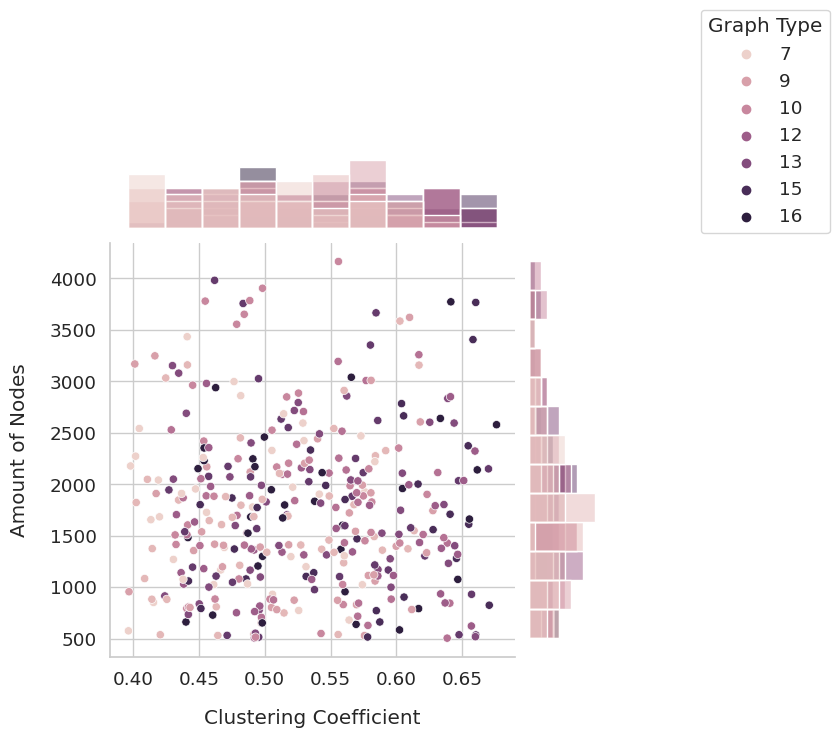

range: 0.11 - 0.13


/tmp/ipykernel_1408435/4196495977.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


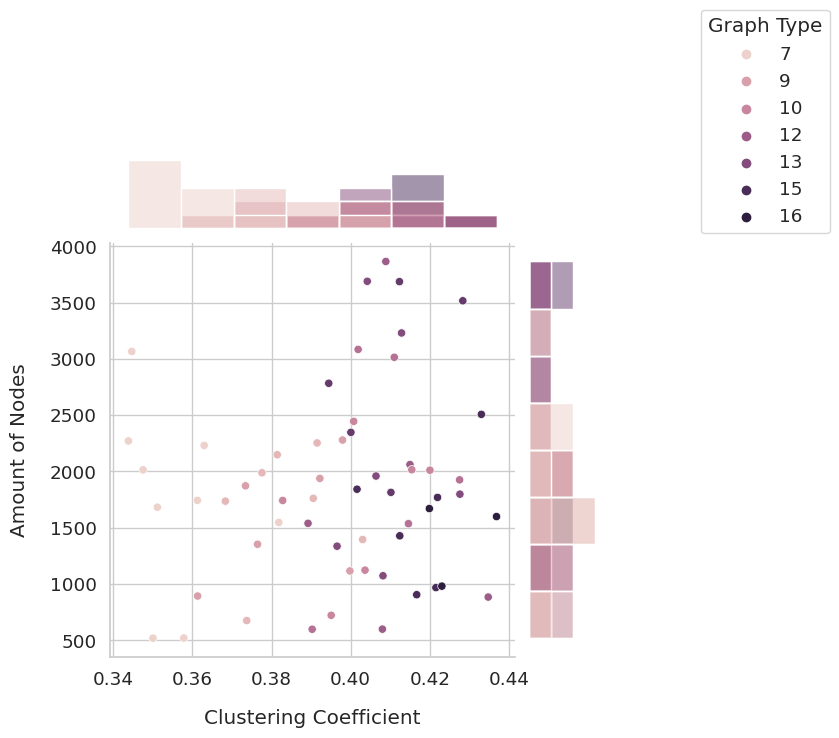

range: 0.13 - 0.15000000000000002


/tmp/ipykernel_1408435/4196495977.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


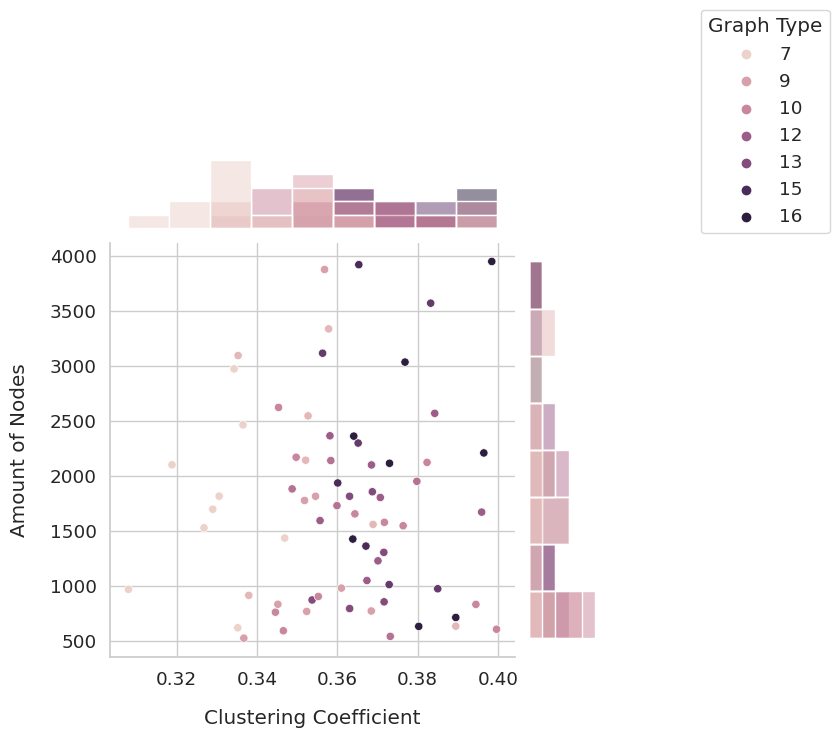

range: 0.15000000000000002 - 0.17


/tmp/ipykernel_1408435/4196495977.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


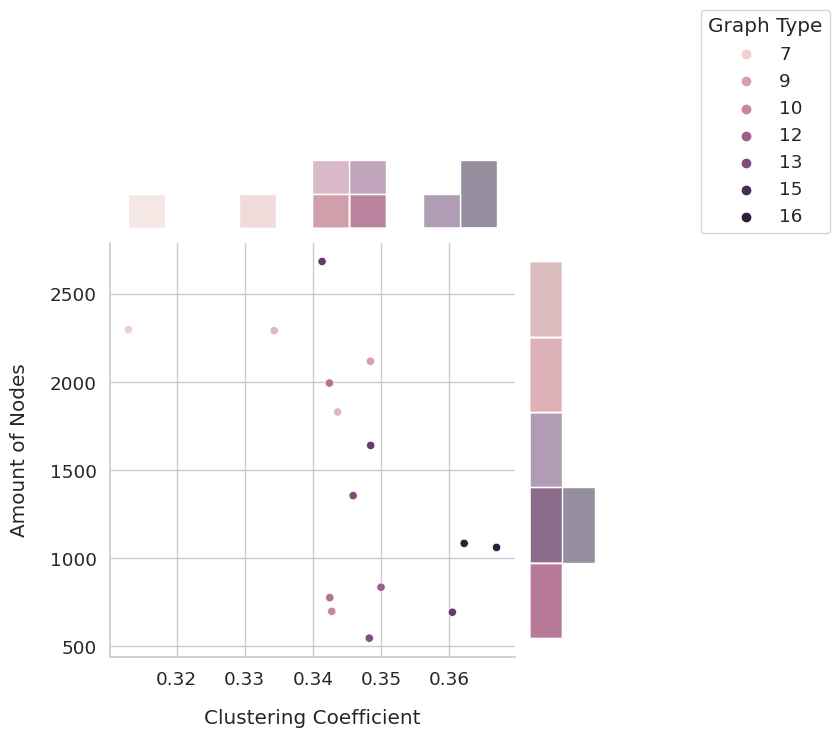

range: 0.17 - 0.19


ValueError: Axes(0.106949,0.0879907;0.710128x0.725836) has no legend attached.

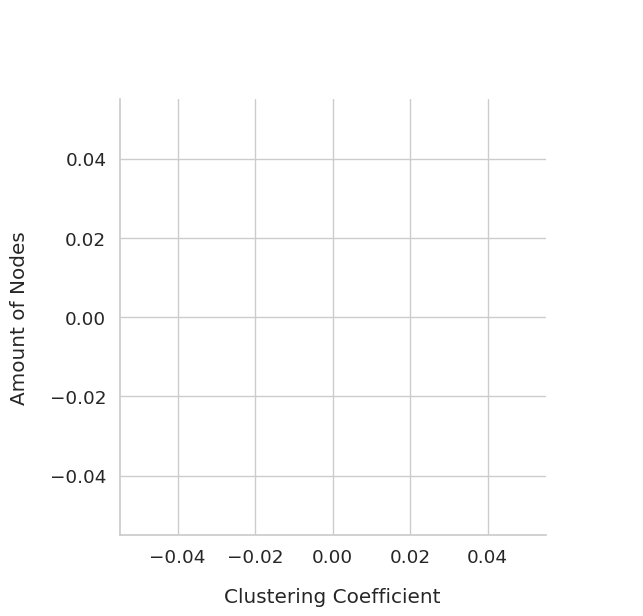

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# create the plot above for every value of prob_reconnect in the range of 0.01 to 0.4 with a step size of 0.1
last = 0
for prob_reconnect in np.arange(0.11, 0.21, 0.02):
    print(f"range: {last} - {prob_reconnect}")
    df = df_metrics[df_metrics["prob_reconnect"].between(last, prob_reconnect)]
    # Set the style
    sns.set(style="whitegrid", font_scale=1.2)

    # Create the plot where the data from every folder has to be plotted in a different color.
    g1 = sns.JointGrid(
        data=df, 
        # y="avg_degree_centrality", 
        # y="diameter", 
        x="average_clustering_coefficient", 
        y="n_nodes", 
        # y="n_edges", 
        hue="neighbours",
    )
    g1.plot(sns.scatterplot, sns.histplot)

    # Customize the plot
    g1.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
    g1.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

    # Set plot title and axis labels
    g1.set_axis_labels("Clustering Coefficient", "Amount of Nodes", labelpad=15)
    sns.move_legend(g1.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

    # Show the plot
    plt.tight_layout()
    plt.show()
    last = prob_reconnect

